# Using the Keras Functional API for Deep Learning

The Keras Python library makes creating deep learning models fast and easy.

The sequential API allows you to create models layer-by-layer for most problems. It is limited in that it does not allow you to create models that share layers or have multiple inputs or outputs.

The functional API in Keras is an alternate way of creating models that offers a lot more flexibility, including creating more complex models.

This notebook is compiled form the blogpost [https://machinelearningmastery.com/keras-functional-api-deep-learning/](https://machinelearningmastery.com/keras-functional-api-deep-learning/) and the Keras tutorial [https://keras.io/getting-started/functional-api-guide/](https://keras.io/getting-started/functional-api-guide/)

## 1. Keras Sequential Models

As a review, Keras provides a Sequential model API.

This is a way of creating deep learning models where an instance of the Sequential class is created and model layers are created and added to it.

For example, the layers can be defined and passed to the Sequential as an array:

In [1]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential([Dense(2, input_dim=1), Dense(1)])

Using TensorFlow backend.


Layers can also be added piecewise:

In [2]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(2, input_dim=1))
model.add(Dense(1))

The Sequential model API is great for developing deep learning models in most situations, but it also has some limitations.

For example, it is not straightforward to define models that may have multiple different input sources, produce multiple output destinations or models that re-use layers.

## 2. Keras Functional Models

The Keras functional API provides a more flexible way for defining models.

It specifically allows you to define multiple input or output models as well as models that share layers. More than that, it allows you to define ad hoc acyclic network graphs.

Models are defined by creating instances of layers and connecting them directly to each other in pairs, then defining a Model that specifies the layers to act as the input and output to the model.

Let’s look at the three unique aspects of Keras functional API in turn:

### 2.1. Defining Input

Unlike the Sequential model, you must create and define a standalone Input layer that specifies the shape of input data.

The input layer takes a shape argument that is a tuple that indicates the dimensionality of the input data.

When input data is one-dimensional, such as for a multilayer Perceptron, the shape must explicitly leave room for the shape of the mini-batch size used when splitting the data when training the network. Therefore, the shape tuple is always defined with a hanging last dimension when the input is one-dimensional (2,), for example:

In [3]:
from keras.layers import Input
visible = Input(shape=(2,))

### 2.2. Connecting Layers

The layers in the model are connected pairwise.

This is done by specifying where the input comes from when defining each new layer. A bracket notation is used, such that after the layer is created, the layer from which the input to the current layer comes from is specified.

Let’s make this clear with a short example. We can create the input layer as above, then create a hidden layer as a Dense that receives input only from the input layer.

In [4]:
from keras.layers import Input
from keras.layers import Dense
visible = Input(shape=(2,))
hidden = Dense(2)(visible)

Note the (visible) after the creation of the Dense layer that connects the input layer output as the input to the dense hidden layer.

It is this way of connecting layers piece by piece that gives the functional API its flexibility. For example, you can see how easy it would be to start defining ad hoc graphs of layers.

### 2.3. Creating the Model

After creating all of your model layers and connecting them together, you must define the model.

As with the Sequential API, the model is the thing you can summarize, fit, evaluate, and use to make predictions.

Keras provides a Model class that you can use to create a model from your created layers. It requires that you only specify the input and output layers. For example:

In [5]:
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
visible = Input(shape=(2,))
hidden = Dense(2)(visible)
model = Model(inputs=visible, outputs=hidden)

Now that we know all of the key pieces of the Keras functional API, let’s work through defining a suite of different models and build up some practice with it.

Each example is executable and prints the structure and creates a diagram of the graph. I recommend doing this for your own models to make it clear what exactly you have defined.

My hope is that these examples provide templates for you when you want to define your own models using the functional API in the future.

## 3. Standard Network Models

When getting started with the functional API, it is a good idea to see how some standard neural network models are defined.

In this section, we will look at defining a simple multilayer Perceptron, convolutional neural network, and recurrent neural network.

These examples will provide a foundation for understanding the more elaborate examples later.

### 3.1 Multilayer Perceptron

In this section, we define a multilayer Perceptron model for binary classification.

The model has 10 inputs, 3 hidden layers with 10, 20, and 10 neurons, and an output layer with 1 output. Rectified linear activation functions are used in each hidden layer and a sigmoid activation function is used in the output layer, for binary classification.

In [6]:
# Multilayer Perceptron
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
visible = Input(shape=(10,))
hidden1 = Dense(10, activation='relu')(visible)
hidden2 = Dense(20, activation='relu')(hidden1)
hidden3 = Dense(10, activation='relu')(hidden2)
output = Dense(1, activation='sigmoid')(hidden3)
model = Model(inputs=visible, outputs=output)

In [7]:
# summarize layers
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 10)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_8 (Dense)              (None, 20)                220       
_________________________________________________________________
dense_9 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 11        
Total params: 551
Trainable params: 551
Non-trainable params: 0
_________________________________________________________________
None


In [8]:
# plot graph
from keras.utils import plot_model
plot_model(model, to_file='images/multilayer_perceptron.png', show_shapes=True, show_layer_names=True)

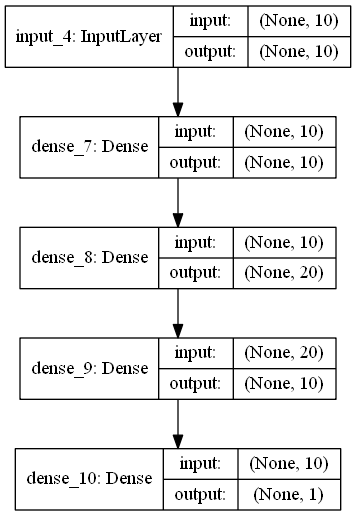

In [9]:
from IPython.display import Image
Image(filename='images/multilayer_perceptron.png')

In [10]:
# plot graph
#from IPython.display import SVG
#from keras.utils.vis_utils import model_to_dot

#SVG(model_to_dot(model, show_shapes=True, show_layer_names=True).create(prog='dot', format='svg'))

### 3.2 Convolutional Neural Network

In this section, we will define a convolutional neural network for image classification.

The model receives black and white 64×64 images as input, then has a sequence of two convolutional and pooling layers as feature extractors, followed by a fully connected layer to interpret the features and an output layer with a sigmoid activation for two-class predictions.

In [11]:
# Convolutional Neural Network
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
visible = Input(shape=(64,64,1))
conv1 = Conv2D(32, kernel_size=4, activation='relu')(visible)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
conv2 = Conv2D(16, kernel_size=4, activation='relu')(pool1)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
hidden1 = Dense(10, activation='relu')(pool2)
output = Dense(1, activation='sigmoid')(hidden1)
model = Model(inputs=visible, outputs=output)

In [12]:
# summarize layers
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 64, 64, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 32)        544       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 27, 27, 16)        8208      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
dense_11 (Dense)             (None, 13, 13, 10)        170       
_________________________________________________________________
dense_12 (Dense)             (None, 13, 13, 1)         11        
Total para

In [13]:
# plot graph
from keras.utils import plot_model
plot_model(model, to_file='images/convolutional_neural_network.png', show_shapes=True, show_layer_names=True)

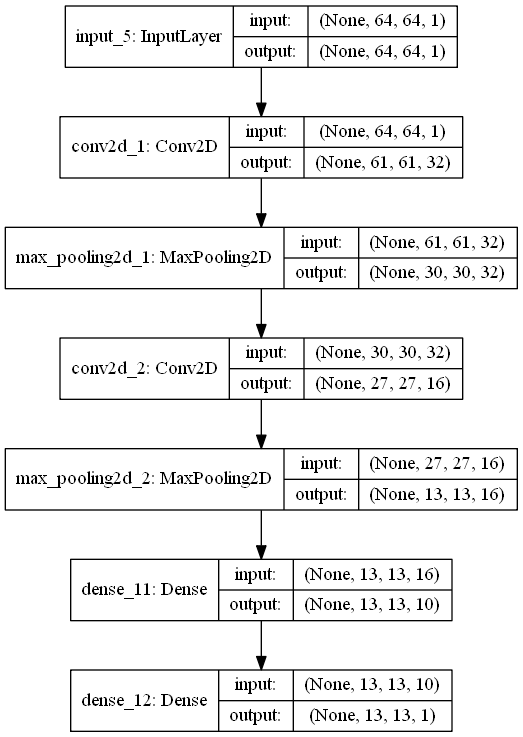

In [14]:
from IPython.display import Image
Image(filename='images/convolutional_neural_network.png')

### 3.3 Recurrent Neural Network

In this section, we will define a long short-term memory recurrent neural network for sequence classification.

The model expects 100 time steps of one feature as input. The model has a single LSTM hidden layer to extract features from the sequence, followed by a fully connected layer to interpret the LSTM output, followed by an output layer for making binary predictions.

In [15]:
# Recurrent Neural Network
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers.recurrent import LSTM
visible = Input(shape=(100,1))
hidden1 = LSTM(10)(visible)
hidden2 = Dense(10, activation='relu')(hidden1)
output = Dense(1, activation='sigmoid')(hidden2)
model = Model(inputs=visible, outputs=output)

In [16]:
# summarize layers
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 100, 1)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 10)                480       
_________________________________________________________________
dense_13 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 11        
Total params: 601
Trainable params: 601
Non-trainable params: 0
_________________________________________________________________
None


In [17]:
# plot graph
from keras.utils import plot_model
plot_model(model, to_file='images/recurrent_neural_network.png', show_shapes=True, show_layer_names=True)

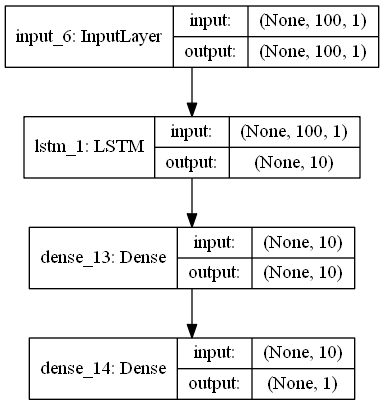

In [18]:
from IPython.display import Image
Image(filename='images/recurrent_neural_network.png')

## 4. Shared Layers Model

Multiple layers can share the output from one layer.

For example, there may be multiple different feature extraction layers from an input, or multiple layers used to interpret the output from a feature extraction layer.

Let’s look at both of these examples.

### 4.1 Shared Input Layer

In this section, we define multiple convolutional layers with differently sized kernels to interpret an image input.

The model takes black and white images with the size 64×64 pixels. There are two CNN feature extraction submodels that share this input; the first has a kernel size of 4 and the second a kernel size of 8. The outputs from these feature extraction submodels are flattened into vectors and concatenated into one long vector and passed on to a fully connected layer for interpretation before a final output layer makes a binary classification.

In [19]:
# Shared Input Layer
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate
# input layer
visible = Input(shape=(64,64,1))
# first feature extractor
conv1 = Conv2D(32, kernel_size=4, activation='relu')(visible)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
flat1 = Flatten()(pool1)
# second feature extractor
conv2 = Conv2D(16, kernel_size=8, activation='relu')(visible)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
flat2 = Flatten()(pool2)
# merge feature extractors
merge = concatenate([flat1, flat2])
# interpretation layer
hidden1 = Dense(10, activation='relu')(merge)
# prediction output
output = Dense(1, activation='sigmoid')(hidden1)
model = Model(inputs=visible, outputs=output)

In [20]:
# summarize layers
print(model.summary())

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            (None, 64, 64, 1)    0                                            
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 61, 61, 32)   544         input_7[0][0]                    
__________________________________________________________________________________________________
conv2d_4 (Conv2D)               (None, 57, 57, 16)   1040        input_7[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_3 (MaxPooling2D)  (None, 30, 30, 32)   0           conv2d_3[0][0]                   
__________________________________________________________________________________________________
max_poolin

In [21]:
# plot graph
from keras.utils import plot_model
plot_model(model, to_file='images/shared_input_layer.png', show_shapes=True, show_layer_names=True)

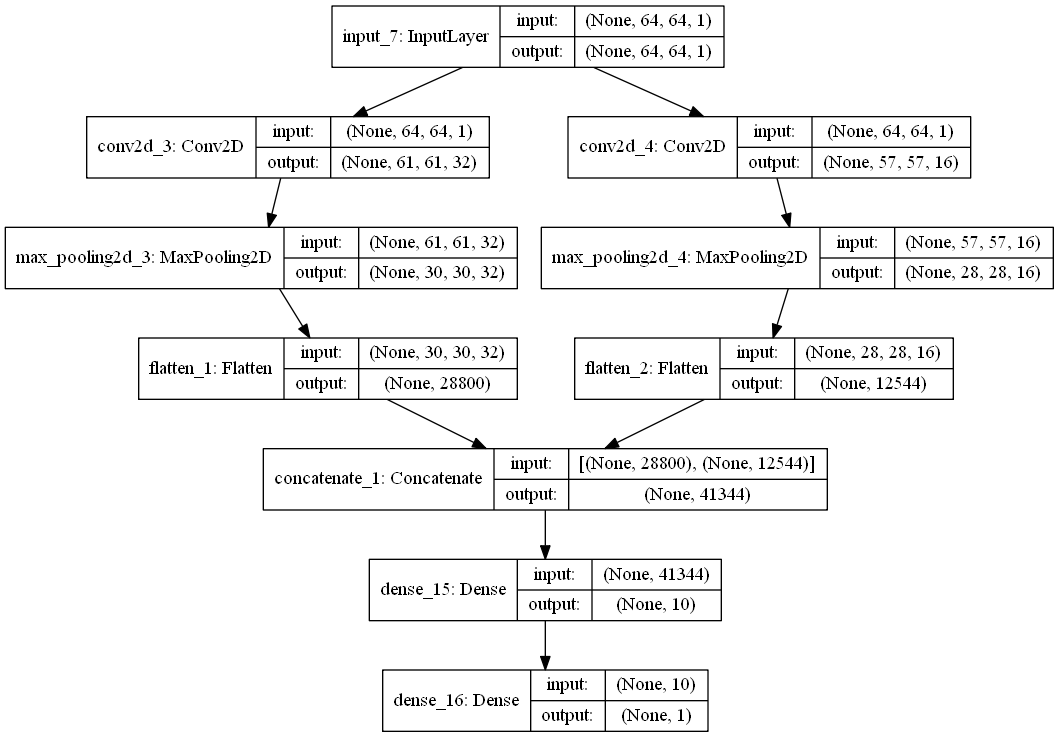

In [22]:
from IPython.display import Image
Image(filename='images/shared_input_layer.png')

### 4.2 Shared Feature Extraction Layer

In this section, we will two parallel submodels to interpret the output of an LSTM feature extractor for sequence classification.

The input to the model is 100 time steps of 1 feature. An LSTM layer with 10 memory cells interprets this sequence. The first interpretation model is a shallow single fully connected layer, the second is a deep 3 layer model. The output of both interpretation models are concatenated into one long vector that is passed to the output layer used to make a binary prediction.

In [23]:
# Shared Feature Extraction Layer
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers.recurrent import LSTM
from keras.layers.merge import concatenate
# define input
visible = Input(shape=(100,1))
# feature extraction
extract1 = LSTM(10)(visible)
# first interpretation model
interp1 = Dense(10, activation='relu')(extract1)
# second interpretation model
interp11 = Dense(10, activation='relu')(extract1)
interp12 = Dense(20, activation='relu')(interp11)
interp13 = Dense(10, activation='relu')(interp12)
# merge interpretation
merge = concatenate([interp1, interp13])
# output
output = Dense(1, activation='sigmoid')(merge)
model = Model(inputs=visible, outputs=output)

In [24]:
# summarize layers
print(model.summary())

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            (None, 100, 1)       0                                            
__________________________________________________________________________________________________
lstm_2 (LSTM)                   (None, 10)           480         input_8[0][0]                    
__________________________________________________________________________________________________
dense_18 (Dense)                (None, 10)           110         lstm_2[0][0]                     
__________________________________________________________________________________________________
dense_19 (Dense)                (None, 20)           220         dense_18[0][0]                   
__________________________________________________________________________________________________
dense_17 (

In [25]:
# plot graph
from keras.utils import plot_model
plot_model(model, to_file='images/shared_feature_extractor.png', show_shapes=True, show_layer_names=True)

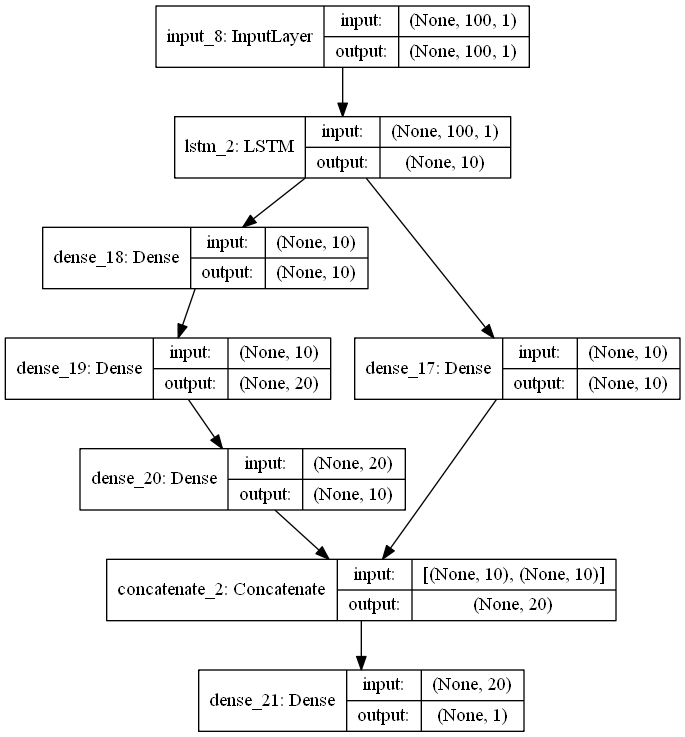

In [26]:
from IPython.display import Image
Image(filename='images/shared_feature_extractor.png')

### 4.3 Shared vision model

This model reuses the same image-processing module on two inputs, to classify whether two MNIST digits are the same digit or different digits.

In [28]:
import  keras
from keras.layers import Conv2D, MaxPooling2D, Input, Dense, Flatten
from keras.models import Model

# First, define the vision modules
digit_input = Input(shape=(27, 27, 1))
x = Conv2D(64, (3, 3))(digit_input)
x = Conv2D(64, (3, 3))(x)
x = MaxPooling2D((2, 2))(x)
out = Flatten()(x)

vision_model = Model(digit_input, out)

# Then define the tell-digits-apart model
digit_a = Input(shape=(27, 27, 1))
digit_b = Input(shape=(27, 27, 1))

# The vision model will be shared, weights and all
out_a = vision_model(digit_a)
out_b = vision_model(digit_b)

concatenated = keras.layers.concatenate([out_a, out_b])
out = Dense(1, activation='sigmoid')(concatenated)

classification_model = Model([digit_a, digit_b], out)

Let's plot the vision model

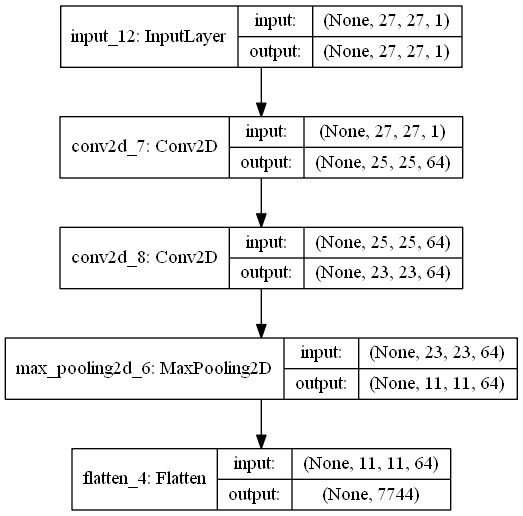

In [29]:
# plot graph
from keras.utils import plot_model
from IPython.display import Image
plot_model(vision_model, to_file='images/vision.png', show_shapes=True, show_layer_names=True)
Image(filename='images/vision.png')

Let's plot the shared vision model which utilizes the above model

In [30]:
# plot graph
from keras.utils import plot_model
plot_model(classification_model, to_file='images/shared_vision.png', show_shapes=True, show_layer_names=True)

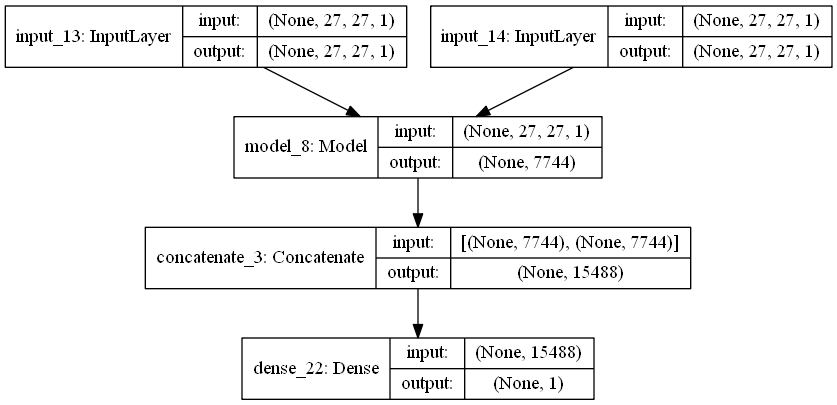

In [31]:
from IPython.display import Image
Image(filename='images/shared_vision.png')

## 4.4 Shared layers

Another good use for the functional API are models that use shared layers. Let's take a look at shared layers.

Let's consider a dataset of tweets. We want to build a model that can tell whether two tweets are from the same person or not (this can allow us to compare users by the similarity of their tweets, for instance).

One way to achieve this is to build a model that encodes two tweets into two vectors, concatenates the vectors and then adds a logistic regression; this outputs a probability that the two tweets share the same author. The model would then be trained on positive tweet pairs and negative tweet pairs.

Because the problem is symmetric, the mechanism that encodes the first tweet should be reused (weights and all) to encode the second tweet. Here we use a shared LSTM layer to encode the tweets.

Let's build this with the functional API. We will take as input for a tweet a binary matrix of shape (140, 256), i.e. a sequence of 140 vectors of size 256, where each dimension in the 256-dimensional vector encodes the presence/absence of a character (out of an alphabet of 256 frequent characters).

In [32]:
import keras
from keras.layers import Input, LSTM, Dense
from keras.models import Model

tweet_a = Input(shape=(140, 256))
tweet_b = Input(shape=(140, 256))

To share a layer across different inputs, simply instantiate the layer once, then call it on as many inputs as you want:

In [33]:
# This layer can take as input a matrix
# and will return a vector of size 64
shared_lstm = LSTM(64)

# When we reuse the same layer instance
# multiple times, the weights of the layer
# are also being reused
# (it is effectively *the same* layer)
encoded_a = shared_lstm(tweet_a)
encoded_b = shared_lstm(tweet_b)

# We can then concatenate the two vectors:
merged_vector = keras.layers.concatenate([encoded_a, encoded_b], axis=-1)

# And add a logistic regression on top
predictions = Dense(1, activation='sigmoid')(merged_vector)

# We define a trainable model linking the
# tweet inputs to the predictions
model = Model(inputs=[tweet_a, tweet_b], outputs=predictions)

In [34]:
# plot graph
from keras.utils import plot_model
plot_model(model, to_file='images/shared_layers.png', show_shapes=True, show_layer_names=True)

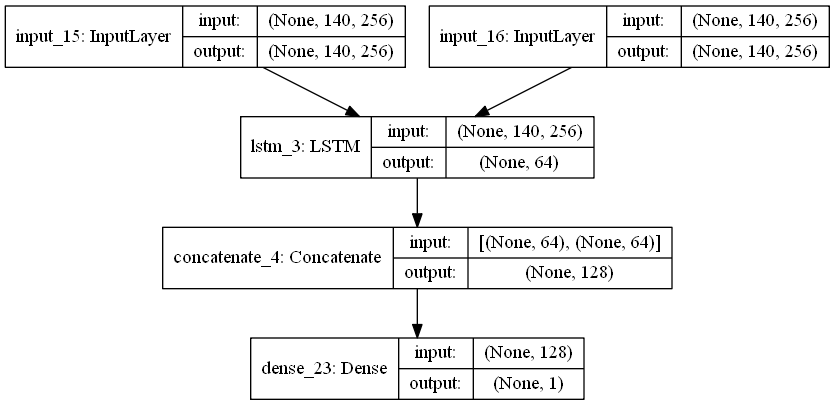

In [35]:
from IPython.display import Image
Image(filename='images/shared_layers.png')

## 5. Multiple Input and Output Models

The functional API can also be used to develop more complex models with multiple inputs, possibly with different modalities. It can also be used to develop models that produce multiple outputs.

We will look at examples of each in this section.

### 5.1 Multiple Input Model

We will develop an image classification model that takes two versions of the image as input, each of a different size. Specifically a black and white 64×64 version and a color 32×32 version. Separate feature extraction CNN models operate on each, then the results from both models are concatenated for interpretation and ultimate prediction.

Note that in the creation of the Model() instance, that we define the two input layers as an array. Specifically:

The complete example is listed below.

In [36]:
# Multiple Inputs
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate
# first input model
visible1 = Input(shape=(64,64,1))
conv11 = Conv2D(32, kernel_size=4, activation='relu')(visible1)
pool11 = MaxPooling2D(pool_size=(2, 2))(conv11)
conv12 = Conv2D(16, kernel_size=4, activation='relu')(pool11)
pool12 = MaxPooling2D(pool_size=(2, 2))(conv12)
flat1 = Flatten()(pool12)
# second input model
visible2 = Input(shape=(32,32,3))
conv21 = Conv2D(32, kernel_size=4, activation='relu')(visible2)
pool21 = MaxPooling2D(pool_size=(2, 2))(conv21)
conv22 = Conv2D(16, kernel_size=4, activation='relu')(pool21)
pool22 = MaxPooling2D(pool_size=(2, 2))(conv22)
flat2 = Flatten()(pool22)
# merge input models
merge = concatenate([flat1, flat2])
# interpretation model
hidden1 = Dense(10, activation='relu')(merge)
hidden2 = Dense(10, activation='relu')(hidden1)
output = Dense(1, activation='sigmoid')(hidden2)
model = Model(inputs=[visible1, visible2], outputs=output)

In [37]:
# summarize layers
print(model.summary())

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_17 (InputLayer)           (None, 64, 64, 1)    0                                            
__________________________________________________________________________________________________
input_18 (InputLayer)           (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_9 (Conv2D)               (None, 61, 61, 32)   544         input_17[0][0]                   
__________________________________________________________________________________________________
conv2d_11 (Conv2D)              (None, 29, 29, 32)   1568        input_18[0][0]                   
__________________________________________________________________________________________________
max_poolin

In [38]:
# plot graph
from keras.utils import plot_model
plot_model(model, to_file='images/multiple_inputs.png', show_shapes=True, show_layer_names=True)

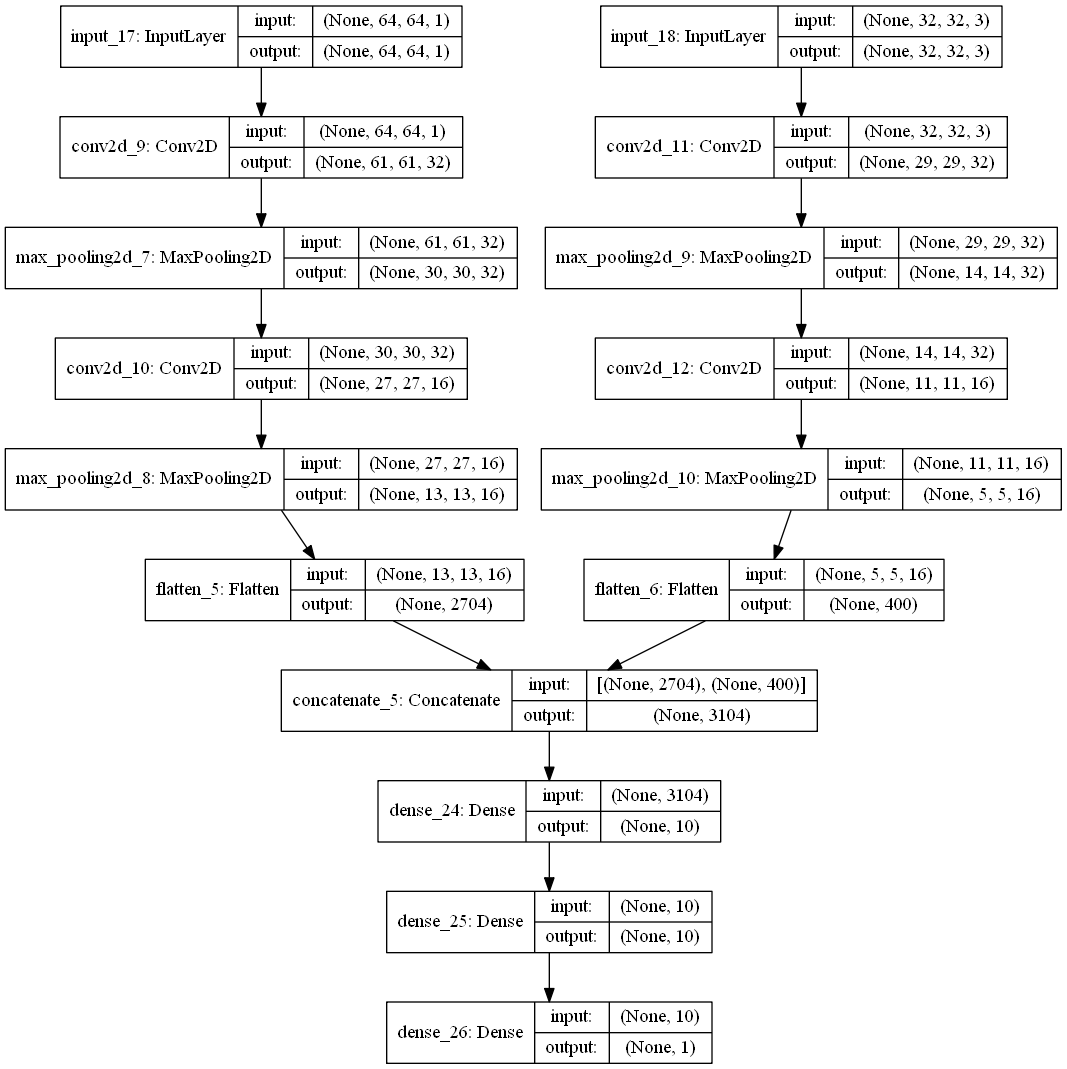

In [39]:
from IPython.display import Image
Image(filename='images/multiple_inputs.png')

In [40]:
# plot graph
#from IPython.display import SVG
#from keras.utils.vis_utils import model_to_dot

#SVG(model_to_dot(model, show_shapes=True, show_layer_names=True).create(prog='dot', format='svg'))

### 5.2 Multiple Output Model

In this section, we will develop a model that makes two different types of predictions. Given an input sequence of 100 time steps of one feature, the model will both classify the sequence and output a new sequence with the same length.

An LSTM layer interprets the input sequence and returns the hidden state for each time step. The first output model creates a stacked LSTM, interprets the features, and makes a binary prediction. The second output model uses the same output layer to make a real-valued prediction for each input time step.

In [41]:
# Multiple Outputs
import keras
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers.recurrent import LSTM
from keras.layers.wrappers import TimeDistributed
# input layer
visible = Input(shape=(100,1))
# feature extraction
extract = LSTM(10, return_sequences=True)(visible)
# classification output
class11 = LSTM(10)(extract)
class12 = Dense(10, activation='relu')(class11)
output1 = Dense(1, activation='sigmoid')(class12)
# sequence output
output2 = TimeDistributed(Dense(1, activation='linear'))(extract)
# output
model = Model(inputs=visible, outputs=[output1, output2])

In [42]:
# summarize layers
print(model.summary())

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_19 (InputLayer)           (None, 100, 1)       0                                            
__________________________________________________________________________________________________
lstm_4 (LSTM)                   (None, 100, 10)      480         input_19[0][0]                   
__________________________________________________________________________________________________
lstm_5 (LSTM)                   (None, 10)           840         lstm_4[0][0]                     
__________________________________________________________________________________________________
dense_27 (Dense)                (None, 10)           110         lstm_5[0][0]                     
__________________________________________________________________________________________________
dense_28 (

In [43]:
# plot graph
from keras.utils import plot_model
plot_model(model, to_file='images/multiple_outputs.png', show_shapes=True, show_layer_names=True)

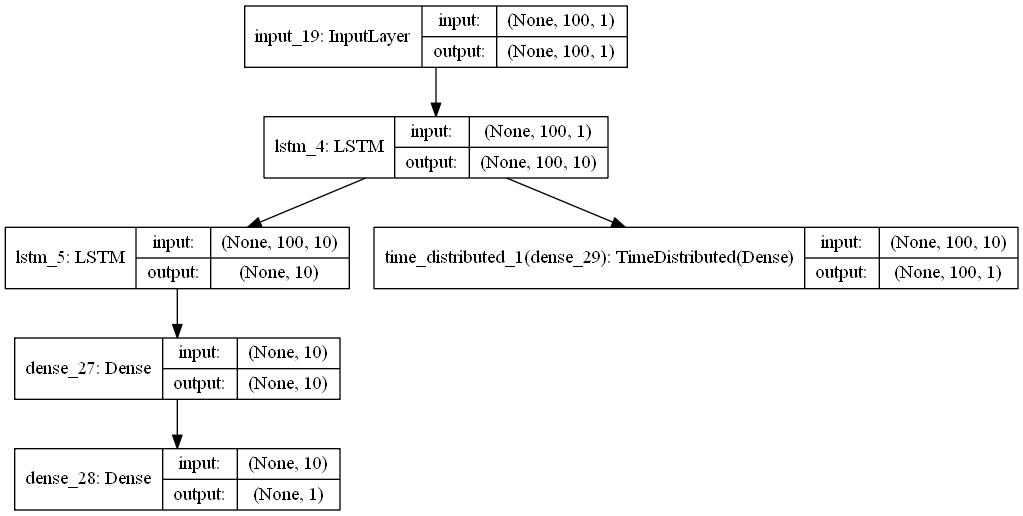

In [44]:
from IPython.display import Image
Image(filename='images/multiple_outputs.png')

### 5.3 Multi-input and multi-output models
https://keras.io/getting-started/functional-api-guide/

Here's a good use case for the functional API: models with multiple inputs and outputs. The functional API makes it easy to manipulate a large number of intertwined datastreams.

Let's consider the following model. We seek to predict how many retweets and likes a news headline will receive on Twitter. The main input to the model will be the headline itself, as a sequence of words, but to spice things up, our model will also have an auxiliary input, receiving extra data such as the time of day when the headline was posted, etc. The model will also be supervised via two loss functions. Using the main loss function earlier in a model is a good regularization mechanism for deep models.

Let's implement it with the functional API.

The main input will receive the headline, as a sequence of integers (each integer encodes a word). The integers will be between 1 and 10,000 (a vocabulary of 10,000 words) and the sequences will be 100 words long.

In [45]:
import keras
from keras.layers import Input, Embedding, LSTM, Dense
from keras.models import Model

# Headline input: meant to receive sequences of 100 integers, between 1 and 10000.
# Note that we can name any layer by passing it a "name" argument.
main_input = Input(shape=(100,), dtype='int32', name='main_input')

# This embedding layer will encode the input sequence
# into a sequence of dense 512-dimensional vectors.
x = Embedding(output_dim=512, input_dim=10000, input_length=100)(main_input)

# A LSTM will transform the vector sequence into a single vector,
# containing information about the entire sequence
lstm_out = LSTM(32)(x)

Here we insert the auxiliary loss, allowing the LSTM and Embedding layer to be trained smoothly even though the main loss will be much higher in the model.

In [46]:
auxiliary_output = Dense(1, activation='sigmoid', name='aux_output')(lstm_out)

At this point, we feed into the model our auxiliary input data by concatenating it with the LSTM output:

In [47]:
auxiliary_input = Input(shape=(5,), name='aux_input')
x = keras.layers.concatenate([lstm_out, auxiliary_input])

# We stack a deep densely-connected network on top
x = Dense(64, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dense(64, activation='relu')(x)

# And finally we add the main logistic regression layer
main_output = Dense(1, activation='sigmoid', name='main_output')(x)

This defines a model with two inputs and two outputs:

In [48]:
model = Model(inputs=[main_input, auxiliary_input], outputs=[main_output, auxiliary_output])

In [49]:
# summarize layers
print(model.summary())

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
main_input (InputLayer)         (None, 100)          0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 100, 512)     5120000     main_input[0][0]                 
__________________________________________________________________________________________________
lstm_6 (LSTM)                   (None, 32)           69760       embedding_1[0][0]                
__________________________________________________________________________________________________
aux_input (InputLayer)          (None, 5)            0                                            
__________________________________________________________________________________________________
concatenat

In [50]:
# plot graph
from keras.utils import plot_model
plot_model(model, to_file='images/multiple_inputs_outputs.png', show_shapes=False, show_layer_names=True)

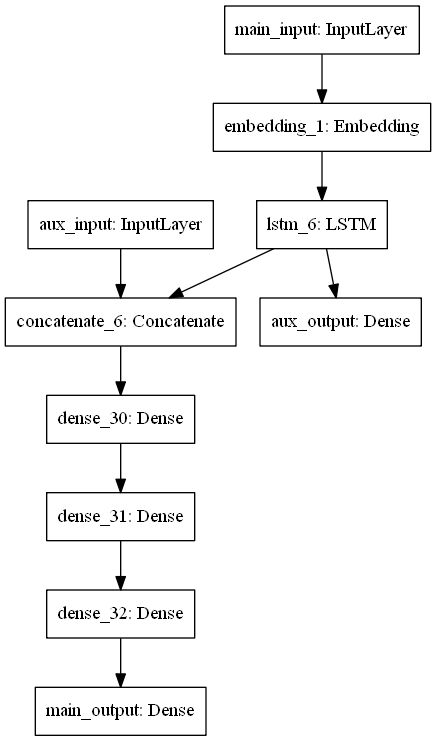

In [51]:
from IPython.display import Image
Image(filename='images/multiple_inputs_outputs.png')

We compile the model and assign a weight of 0.2 to the auxiliary loss. To specify different `loss_weights` or `loss` for each different output, you can use a list or a dictionary. Here we pass a single loss as the `loss` argument, so the same loss will be used on all outputs.

In [52]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', loss_weights=[1., 0.2])

We can train the model by passing it lists of input arrays and target arrays:

Since our inputs and outputs are named (we passed them a "name" argument), We could also have compiled the model via:

## 6. Question Answering model

### Visual question answering model

This model can select the correct one-word answer when asked a natural-language question about a picture.

It works by encoding the question into a vector, encoding the image into a vector, concatenating the two, and training on top a logistic regression over some vocabulary of potential answers.

In [53]:
import keras
from keras.layers import Conv2D, MaxPooling2D, Flatten
from keras.layers import Input, LSTM, Embedding, Dense
from keras.models import Model, Sequential

# First, let's define a vision model using a Sequential model.
# This model will encode an image into a vector.
vision_model = Sequential()
vision_model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(224, 224, 3)))
vision_model.add(Conv2D(64, (3, 3), activation='relu'))
vision_model.add(MaxPooling2D((2, 2)))
vision_model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
vision_model.add(Conv2D(128, (3, 3), activation='relu'))
vision_model.add(MaxPooling2D((2, 2)))
vision_model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
vision_model.add(Conv2D(256, (3, 3), activation='relu'))
vision_model.add(Conv2D(256, (3, 3), activation='relu'))
vision_model.add(MaxPooling2D((2, 2)))
vision_model.add(Flatten())

# Now let's get a tensor with the output of our vision model:
image_input = Input(shape=(224, 224, 3))
encoded_image = vision_model(image_input)

# Next, let's define a language model to encode the question into a vector.
# Each question will be at most 100 word long,
# and we will index words as integers from 1 to 9999.
question_input = Input(shape=(100,), dtype='int32')
embedded_question = Embedding(input_dim=10000, output_dim=256, input_length=100)(question_input)
encoded_question = LSTM(256)(embedded_question)

# Let's concatenate the question vector and the image vector:
merged = keras.layers.concatenate([encoded_question, encoded_image])

# And let's train a logistic regression over 1000 words on top:
output = Dense(1000, activation='softmax')(merged)

# This is our final model:
vqa_model = Model(inputs=[image_input, question_input], outputs=output)

# The next stage would be training this model on actual data.

In [54]:
# plot graph
from keras.utils import plot_model
plot_model(vqa_model, to_file='images/visual_question_answering.png', show_shapes=True, show_layer_names=True)

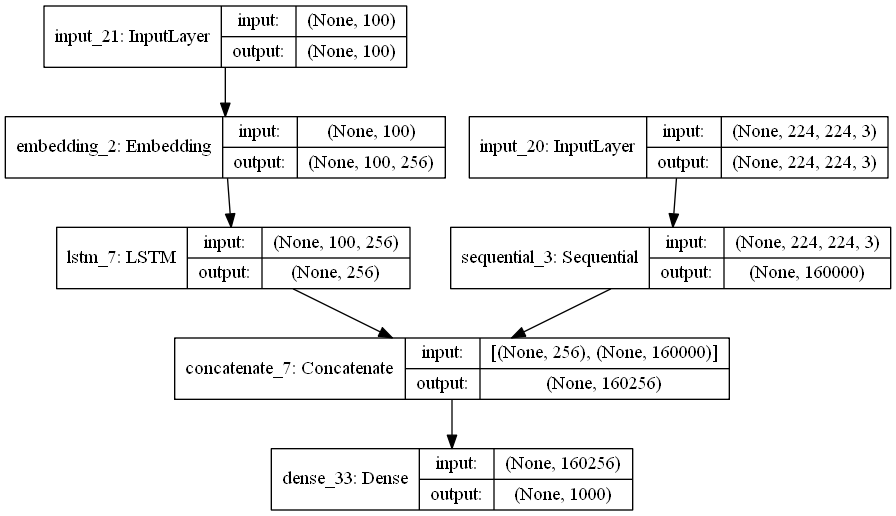

In [55]:
from IPython.display import Image
Image(filename='images/visual_question_answering.png')

### Video question answering model

Now that we have trained our image QA model, we can quickly turn it into a video QA model. With appropriate training, you will be able to show it a short video (e.g. 100-frame human action) and ask a natural language question about the video (e.g. "what sport is the boy playing?" -> "football").

In [56]:
from keras.layers import TimeDistributed

video_input = Input(shape=(100, 224, 224, 3))
# This is our video encoded via the previously trained vision_model (weights are reused)
encoded_frame_sequence = TimeDistributed(vision_model)(video_input)  # the output will be a sequence of vectors
encoded_video = LSTM(256)(encoded_frame_sequence)  # the output will be a vector

# This is a model-level representation of the question encoder, reusing the same weights as before:
question_encoder = Model(inputs=question_input, outputs=encoded_question)

# Let's use it to encode the question:
video_question_input = Input(shape=(100,), dtype='int32')
encoded_video_question = question_encoder(video_question_input)

# And this is our video question answering model:
merged = keras.layers.concatenate([encoded_video, encoded_video_question])
output = Dense(1000, activation='softmax')(merged)
video_qa_model = Model(inputs=[video_input, video_question_input], outputs=output)

In [57]:
# plot graph
from keras.utils import plot_model
plot_model(video_qa_model, to_file='images/video_question_answering.png', show_shapes=True, show_layer_names=True)

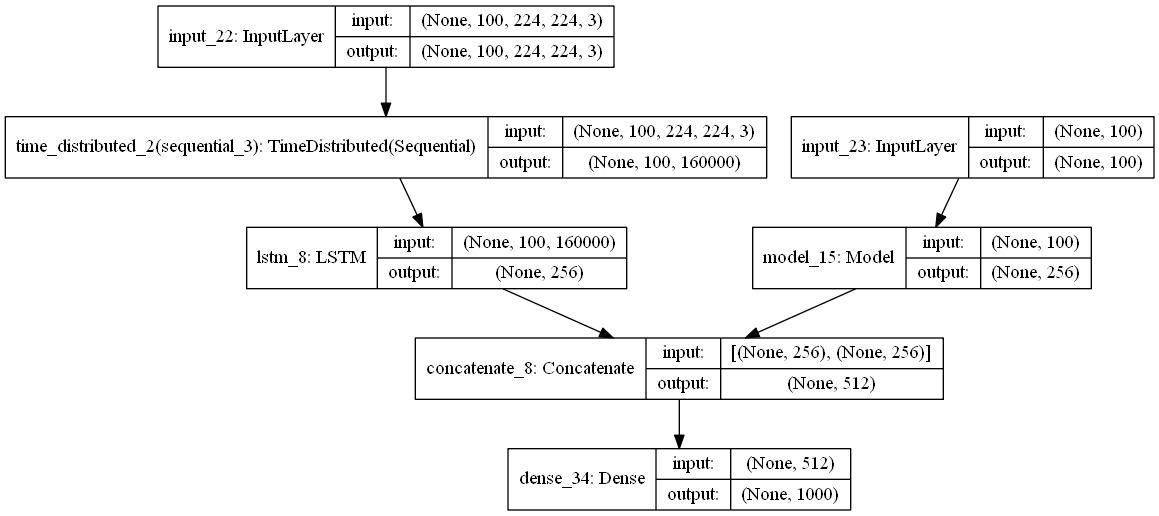

In [58]:
from IPython.display import Image
Image(filename='images/video_question_answering.png')

## 7. Inception Module

In [59]:
from keras.layers import Conv2D, MaxPooling2D, Input

input_img = Input(shape=(256, 256, 3))

tower_1 = Conv2D(64, (1, 1), padding='same', activation='relu')(input_img)
tower_1 = Conv2D(64, (3, 3), padding='same', activation='relu')(tower_1)

tower_2 = Conv2D(64, (1, 1), padding='same', activation='relu')(input_img)
tower_2 = Conv2D(64, (5, 5), padding='same', activation='relu')(tower_2)

tower_3 = MaxPooling2D((3, 3), strides=(1, 1), padding='same')(input_img)
tower_3 = Conv2D(64, (1, 1), padding='same', activation='relu')(tower_3)

output = keras.layers.concatenate([tower_1, tower_2, tower_3], axis=1)

## 8. Residual connection on a convolution layer

In [60]:
import keras
from keras.layers import Conv2D, Input

# input tensor for a 3-channel 256x256 image
x = Input(shape=(256, 256, 3))
# 3x3 conv with 3 output channels (same as input channels)
y = Conv2D(3, (3, 3), padding='same')(x)
# this returns x + y.
z = keras.layers.add([x, y])

## 9. Best Practices

In this section, I want to give you some tips to get the most out of the functional API when you are defining your own models.

- **Consistent Variable Names**. Use the same variable name for the input (visible) and output layers (output) and perhaps even the hidden layers (hidden1, hidden2). It will help to connect things together correctly.

- **Review Layer Summary**. Always print the model summary and review the layer outputs to ensure that the model was connected together as you expected.

- **Review Graph Plots**. Always create a plot of the model graph and review it to ensure that everything was put together as you intended.

- **Name the layers**. You can assign names to layers that are used when reviewing summaries and plots of the model graph. For example: Dense(1, name='hidden1').

- **Separate Submodels**. Consider separating out the development of submodels and combine the submodels together at the end.